In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.368597,-0.855418,0.548883,0.474478
2013-01-02,0.120976,-2.006779,0.293528,0.711830
2013-01-03,1.259755,0.288048,-1.426811,1.456319
2013-01-04,-0.870276,0.009521,-0.012989,-2.612958
2013-01-05,-1.531440,-1.056608,-0.445234,-0.069317
2013-01-06,-0.027681,-0.356085,1.442345,-0.889581


In [7]:
df2 = pd.DataFrame( 
    { 
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' 
    })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.dtypes # df2.<TAB>

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [9]:
df.head(3)
df.tail(3)
df.describe()
df.index
df.columns
df.T
df.sort_index(axis=1, ascending=False) #axis=1 (columns) 0(rows)
df['A']
df[0:3]
df['20130102':'20130104']
df.loc[dates[0]]
df.loc[:,['A','B']]
df.loc['20130102':'20130104',['A','B']]
df.loc['20130102',['A','B']]
df.loc[dates[0],'A']
df.iloc[3]
df.iloc[3:5,0:2]
df.iloc[[1,2,4],[0,2]]
df.iloc[1:3,:]
df.iloc[:,1:3]
df.iloc[1,1]
df[df.A > 0]
df[df > 0]


,A,B,C,D
2013-01-01,1.368597,NaN,0.548883,0.474478
2013-01-02,0.120976,NaN,0.293528,0.711830
2013-01-03,1.259755,0.288048,NaN,1.456319
2013-01-04,NaN,0.009521,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,1.442345,NaN


In [10]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2[df2['E'].isin(['two','four'])]


,A,B,C,D,E
2013-01-03,1.259755,0.288048,-1.426811,1.456319,two
2013-01-05,-1.531440,-1.056608,-0.445234,-0.069317,four


In [11]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:,'D'] = np.array([5] * len(df))
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.548883,5,NaN
2013-01-02,0.120976,-2.006779,0.293528,5,1.0
2013-01-03,1.259755,0.288048,-1.426811,5,2.0
2013-01-04,-0.870276,0.009521,-0.012989,5,3.0
2013-01-05,-1.531440,-1.056608,-0.445234,5,4.0
2013-01-06,-0.027681,-0.356085,1.442345,5,5.0


In [12]:
df2 = df.copy()
df2[df2 > 0] = -df2 # negates all values in df2 to -value
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.548883,-5,NaN
2013-01-02,-0.120976,-2.006779,-0.293528,-5,-1.0
2013-01-03,-1.259755,-0.288048,-1.426811,-5,-2.0
2013-01-04,-0.870276,-0.009521,-0.012989,-5,-3.0
2013-01-05,-1.531440,-1.056608,-0.445234,-5,-4.0
2013-01-06,-0.027681,-0.356085,-1.442345,-5,-5.0


In [13]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.548883,5,NaN,1.0
2013-01-02,0.120976,-2.006779,0.293528,5,1.0,1.0
2013-01-03,1.259755,0.288048,-1.426811,5,2.0,NaN
2013-01-04,-0.870276,0.009521,-0.012989,5,3.0,NaN


In [14]:
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,0.120976,-2.006779,0.293528,5,1.0,1.0


In [15]:
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.548883,5,5.0,1.0
2013-01-02,0.120976,-2.006779,0.293528,5,1.0,1.0
2013-01-03,1.259755,0.288048,-1.426811,5,2.0,5.0
2013-01-04,-0.870276,0.009521,-0.012989,5,3.0,5.0


In [16]:
pd.isnull(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [17]:
df.mean(1) # axis 1

2013-01-01    1.387221
2013-01-02    0.881545
2013-01-03    1.424198
2013-01-04    1.425251
2013-01-05    1.193344
2013-01-06    2.211716
Freq: D, dtype: float64

In [18]:
df.mean()

A   -0.174778
B   -0.520317
C    0.066620
D    5.000000
F    3.000000
dtype: float64

In [19]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [20]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.259755,-0.711952,-2.426811,4.0,1.0
2013-01-04,-3.870276,-2.990479,-3.012989,2.0,0.0
2013-01-05,-6.531440,-6.056608,-5.445234,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [21]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.548883,5,NaN
2013-01-02,0.120976,-2.006779,0.842411,10,1.0
2013-01-03,1.380730,-1.718731,-0.584401,15,3.0
2013-01-04,0.510455,-1.709210,-0.597390,20,6.0
2013-01-05,-1.020985,-2.765819,-1.042623,25,10.0
2013-01-06,-1.048666,-3.121904,0.399722,30,15.0


In [22]:
help(np.cumsum)

Help on function cumsum in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See `doc.ufuncs`
        (Section

In [23]:
df.apply(lambda x: x.max() - x.min())

A    2.791195
B    2.294826
C    2.869157
D    0.000000
F    4.000000
dtype: float64

In [24]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    0
3    0
4    2
5    0
6    0
7    4
8    2
9    5
dtype: int32

In [25]:
s.value_counts()

0    4
2    3
5    1
4    1
1    1
dtype: int64

In [26]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [27]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.835267,0.562835,-1.058379,-0.524360
1,-0.673855,0.788969,-0.708640,1.456430
2,-0.730600,1.450393,-1.392568,-0.013652
3,1.789542,0.081379,0.211944,0.173410
4,-2.292395,1.596873,-0.102109,-0.552752
5,-0.487685,-0.273470,0.527142,0.058064
6,-0.831886,0.575746,-1.227479,0.528974
7,-0.227602,0.103872,-0.102413,-1.261369
8,-0.802167,-1.905771,-1.206680,-1.058953
9,0.009999,0.966852,1.429974,-0.607350


In [28]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.835267,0.562835,-1.058379,-0.524360
1,-0.673855,0.788969,-0.708640,1.456430
2,-0.730600,1.450393,-1.392568,-0.013652
3,1.789542,0.081379,0.211944,0.173410
4,-2.292395,1.596873,-0.102109,-0.552752
5,-0.487685,-0.273470,0.527142,0.058064
6,-0.831886,0.575746,-1.227479,0.528974
7,-0.227602,0.103872,-0.102413,-1.261369
8,-0.802167,-1.905771,-1.206680,-1.058953
9,0.009999,0.966852,1.429974,-0.607350


### JOINS

In [29]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'val': [1, 2]})
left

,key,val
0,foo,1
1,bar,2


In [30]:
right = pd.DataFrame({'key': ['foo', 'den'], 'val': [4, 5]})
right

,key,val
0,foo,4
1,den,5


In [31]:
pd.merge(left, right, on='key')

,key,val_x,val_y
0,foo,1,4


In [32]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)
df


,A,B,C,D
0,0.963956,-0.513548,-0.675151,-0.868537
1,-1.555136,-1.177432,1.028354,-0.841162
2,2.818262,-0.004952,-1.093051,1.069976
3,-1.785823,0.192837,-1.215597,-0.680886
4,-0.426578,-1.314461,0.764916,-1.582597
5,0.521653,1.402278,-0.874815,-0.590031
6,-1.670370,-0.489557,-0.117907,-1.869892
7,-0.272353,0.668701,0.227114,-2.871396


### Grouping

In [33]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
'foo', 'bar', 'foo', 'foo'],
'B' : ['one', 'one', 'two', 'three',
'two', 'two', 'one', 'three'],
'C' : np.random.randn(8),
'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.411712,0.142283
1,bar,one,0.910373,-0.632441
2,foo,two,-0.424691,2.135483
3,bar,three,0.547303,-0.420295
4,foo,two,-0.181675,0.397078
5,bar,two,0.157546,1.020386
6,foo,one,-2.031580,-1.169274
7,foo,three,0.702180,0.662535


In [34]:
df.groupby('A').sum()

,C,D
A,,
bar,1.615222,-0.032350
foo,-2.347478,2.168104


In [35]:
df.groupby(['A','B']).sum() # Not suming one

C         D
A   B                        
bar one    0.910373 -0.632441
    three  0.547303 -0.420295
    two    0.157546  1.020386
foo one   -2.443292 -1.026991
    three  0.702180  0.662535
    two   -0.606367  2.532560

### Reshaping

In [36]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
'foo', 'foo', 'qux', 'qux'],
['one', 'two', 'one', 'two',
'one', 'two', 'one', 'two']]))
print(tuples)
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(index)
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print(df)
df2 = df[:4]
df2

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])
                     A         B
first second                    
bar   one    -0.098156  0.977101
      two     0.017532 -0.883251
baz   one    -0.552611  0.232064
      two    -0.079148  0.281502
foo   one     0.703361  1.053673
      two     0.620409 -2.026360
qux   one    -0.352220 -0.918521
      two     0.144742  0.116657


A         B
first second                    
bar   one    -0.098156  0.977101
      two     0.017532 -0.883251
baz   one    -0.552611  0.232064
      two    -0.079148  0.281502

In [37]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.098156
               B    0.977101
       two     A    0.017532
               B   -0.883251
baz    one     A   -0.552611
               B    0.232064
       two     A   -0.079148
               B    0.281502
dtype: float64

In [38]:
stacked.unstack()

A         B
first second                    
bar   one    -0.098156  0.977101
      two     0.017532 -0.883251
baz   one    -0.552611  0.232064
      two    -0.079148  0.281502

### PIVOT TABLE

In [39]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
'B' : ['A', 'B', 'C'] * 4,
'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
'D' : np.random.randn(12),
'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.723530,-1.147729
1,one,B,foo,-1.201272,-0.861679
2,two,C,foo,-1.607168,-0.756428
3,three,A,bar,-1.129712,0.452663
4,one,B,bar,0.052819,0.020853
5,one,C,bar,-0.563955,-0.322405
6,two,A,foo,1.195409,0.040756
7,three,B,foo,0.062329,0.803587
8,one,C,foo,-0.059884,-0.064736
9,one,A,bar,0.342819,-1.695758


In [40]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.342819  0.723530
      B  0.052819 -1.201272
      C -0.563955 -0.059884
three A -1.129712       NaN
      B       NaN  0.062329
      C -0.205412       NaN
two   A       NaN  1.195409
      B -0.606477       NaN
      C       NaN -1.607168

### Time Series

In [41]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26940
Freq: 5T, dtype: int32

In [42]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.771025
2012-03-07    1.029314
2012-03-08    1.073199
2012-03-09    1.338196
2012-03-10   -0.051699
Freq: D, dtype: float64

In [43]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.771025
2012-03-07 00:00:00+00:00    1.029314
2012-03-08 00:00:00+00:00    1.073199
2012-03-09 00:00:00+00:00    1.338196
2012-03-10 00:00:00+00:00   -0.051699
Freq: D, dtype: float64

In [44]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.771025
2012-03-06 19:00:00-05:00    1.029314
2012-03-07 19:00:00-05:00    1.073199
2012-03-08 19:00:00-05:00    1.338196
2012-03-09 19:00:00-05:00   -0.051699
Freq: D, dtype: float64

In [45]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.569707
2012-02-29    0.073450
2012-03-31    0.478529
2012-04-30    1.129424
2012-05-31    0.168456
Freq: M, dtype: float64

In [46]:
ps = ts.to_period()
ps

2012-01   -0.569707
2012-02    0.073450
2012-03    0.478529
2012-04    1.129424
2012-05    0.168456
Freq: M, dtype: float64

In [47]:
ps.to_timestamp()
ps

2012-01   -0.569707
2012-02    0.073450
2012-03    0.478529
2012-04    1.129424
2012-05    0.168456
Freq: M, dtype: float64

In [48]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.493043
1990-06-01 09:00    1.502090
1990-09-01 09:00    1.675992
1990-12-01 09:00   -1.711563
1991-03-01 09:00    0.085493
Freq: H, dtype: float64

### Categorical

In [49]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [50]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [51]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df['grade']


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [52]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [53]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

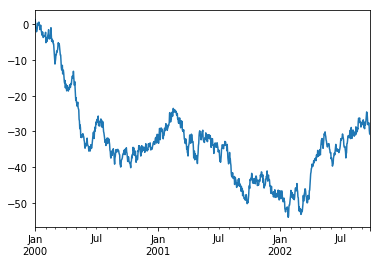

In [54]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

                   A         B         C         D         E
2000-01-01 -1.362040 -0.908962 -0.004970 -0.163821 -0.093599
2000-01-02 -0.830447  0.213980 -0.558965 -0.027941  0.276056
2000-01-03 -1.349862 -0.239149  1.472412 -1.813716  0.409621
2000-01-04  0.300830 -2.489064  0.933580 -0.490444 -1.079621
2000-01-05  2.476517 -0.719525  0.650026 -0.918977 -0.518564
...              ...       ...       ...       ...       ...
2002-09-22 -2.111353 -0.352593  2.101366  0.147525  1.234210
2002-09-23  0.977845 -0.489373 -1.141732  0.567304 -2.144262
2002-09-24  0.118932 -0.003410 -1.682100 -0.325039 -0.869961
2002-09-25 -1.015481 -0.220259 -0.704949 -0.306471 -1.431209
2002-09-26  0.315983  0.353250  0.710311 -2.486116 -0.521143

[1000 rows x 5 columns]


<Figure size 432x288 with 0 Axes>

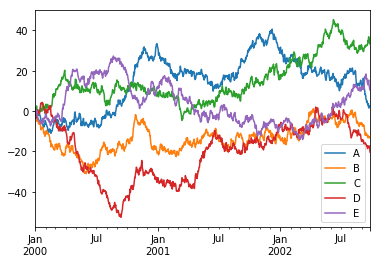

In [55]:
df = pd.DataFrame(np.random.randn(1000, 5), index=ts.index,
columns=['A', 'B', 'C', 'D','E'])
print(df)
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Input Output

In [ ]:
'''
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
df.to_excel('foo.xlsx', sheet_name='Sheet1')
df.to_csv('foo.csv')
pd.read_csv('foo.csv')
'''

### Cookbook

In [57]:
df = pd.DataFrame(
{'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [62]:
df.loc[df.AAA >= 5,'BBB'] = -1; df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [63]:
df.loc[df.AAA >= 5,['BBB','CCC']] = 555; df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [65]:
df.loc[df.AAA < 5,['BBB','CCC']] = 2000; df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [66]:
df_mask = pd.DataFrame({'AAA' : [True] * 4, 'BBB' : [False] * 4,'CCC' : [True,False] * 2})
df.where(df_mask,-1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [67]:
df = pd.DataFrame(
{'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [68]:
df['logic'] = np.where(df['AAA'] > 5,'high','low'); df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


### Splitting

In [69]:
df = pd.DataFrame(
{'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [74]:
dflow = df[df.AAA <= 5]
dfhigh = df[df.AAA > 5]
print(dflow) 
print(dfhigh)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
   AAA  BBB  CCC
2    6   30  -30
3    7   40  -50


### Building Criteria

In [75]:
df = pd.DataFrame(
{'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [76]:
newseries = df.loc[(df['BBB'] < 25) & (df['CCC'] >= -40), 'AAA']; newseries

0    4
1    5
Name: AAA, dtype: int64

In [79]:
newseries = df.loc[(df['BBB'] > 25) | (df['CCC'] >= -40), 'AAA']; newseries;

In [80]:
df.loc[(df['BBB'] > 25) | (df['CCC'] >= 75), 'AAA'] = 0.1; df

,AAA,BBB,CCC
0,0.1,10,100
1,5.0,20,50
2,0.1,30,-30
3,0.1,40,-50


In [81]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [82]:
aValue = 43.0
df.loc[(df.CCC-aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [83]:
df = pd.DataFrame(
{'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [85]:
df = pd.DataFrame(
{'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [95]:
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC > -40.0
AllCrit = Crit1 & Crit2 & Crit3 
df[AllCrit]

# or


,AAA,BBB,CCC
0,4,10,100


In [93]:
import functools
CritList = [Crit1,Crit2,Crit3]
AllCrit = functools.reduce(lambda x,y: x & y, CritList)
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


### Selection
8.2.1 DataFrames

In [96]:
df = pd.DataFrame(
{'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [97]:
df[(df.AAA <= 6) & (df.index.isin([0,2,4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [98]:
data = {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}

In [99]:
df = pd.DataFrame(data=data,index=['foo','bar','boo','kar']); df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [100]:
df.loc['bar':'kar'] #Label

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [103]:
df.iloc[0:3] #Same as .loc[]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [105]:
df2 = pd.DataFrame(data=data,index=[1,2,3,4]); #Note index starts at 1.

In [106]:
df2.iloc[1:3] #Position-oriented

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [107]:
df2.loc[1:3] #Label-oriented

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [108]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [109]:
df[~((df.AAA <= 6) & (df.index.isin([0,2,4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


In [ ]:
'''
rng = pd.date_range('1/1/2013',periods=100,freq='D')
data = np.random.randn(100, 4)
cols = ['A','B','C','D']
df1, df2, df3 = pd.DataFrame((data, rng, cols), pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols))
pf = pd.Panel({'df1':df1,'df2':df2,'df3':df3});pf
'''
# error not working

In [ ]:
'''
pf = pf.transpose(2,0,1)
pf['E'] = pd.DataFrame(data, rng, cols)
pf = pf.transpose(1,2,0);pf
'''
# pf.loc[:,:,'F'] = pd.DataFrame(data, rng, cols);pf

### New Columns using apply map

In [114]:
df = pd.DataFrame({'AAA' : [1,2,1,3], 'BBB' : [1,1,2,2], 'CCC' : [2,1,3,1]}); df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [115]:
source_cols = df.columns # or some subset would work too.
new_cols = [str(x) + "_cat" for x in source_cols]
categories = {1 : 'Alpha', 2 : 'Beta', 3 : 'Charlie' }
df[new_cols] = df[source_cols].applymap(categories.get);
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [116]:
df = pd.DataFrame({'AAA' : [1,1,1,2,2,2,3,3], 'BBB' : [2,1,3,4,5,1,2,3]}); df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


Method 1 :#### idxmin() to get the index of the mins

In [117]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


#### Method 2 : sort then take first of each

In [118]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


### MultiIndexing

In [123]:
df = pd.DataFrame({'row' : [0,1,2],
'One_X' : [1.1,1.1,1.1],
'One_Y' : [1.2,1.2,1.2],
'Two_X' : [1.11,1.11,1.11],
'Two_Y' : [1.22,1.22,1.22]}); df


,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [124]:
df = df.set_index('row');df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [125]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns]);df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [126]:
# Now stack & Reset
df = df.stack(0).reset_index(1);df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [127]:
# And fix the labels (Notice the label 'level_1' got added automatically)
df.columns = ['Sample','All_X','All_Y'];df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


### Arithmetic
Performing arithmetic with a multi-index that needs broadcasting


In [128]:
cols = pd.MultiIndex.from_tuples([ (x,y) for x in ['A','B','C'] for y in ['O','I']])
df = pd.DataFrame(np.random.randn(2,6),index=['n','m'],columns=cols); df

A                   B                   C          
          O         I         O         I         O         I
n -0.454033 -2.783732 -0.257524  1.852928 -0.845369  0.534674
m  0.614100  0.057614  0.349199 -0.225613 -1.240008  1.398667

In [129]:
df = df.div(df['C'],level=1); df

A                   B              C     
          O         I         O         I    O    I
n  0.537083 -5.206407  0.304629  3.465526  1.0  1.0
m -0.495239  0.041192 -0.281610 -0.161306  1.0  1.0

### Slicing
Slicing a multi-index with xs

In [135]:
coords = [('AA','one'),('AA','six'),('BB','one'),('BB','two'),('BB','six')]
In [68]: index = pd.MultiIndex.from_tuples(coords)
In [69]: df = pd.DataFrame([11,22,33,44,55],index,['MyData']); df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [136]:
df.xs('BB',level=0,axis=0) #Note : level and axis are optional, and default to zero

,MyData
one,33
two,44
six,55


In [137]:
df.xs('six',level=1,axis=0)

,MyData
AA,22
BB,55


### Missing Data
The missing data docs.
Fill forward a reversed timeseries

In [150]:
df = pd.DataFrame(np.random.randn(6,1), index=pd.date_range('2013-08-01', periods=6, freq='B'))

In [154]:
df.iloc[3,0] = np.nan
df

,0
2013-08-01,2.223197
2013-08-02,-1.484686
2013-08-05,-2.253155
2013-08-06,NaN
2013-08-07,-0.568851
2013-08-08,2.442444


In [155]:
df.reindex(df.index[::-1]).ffill()

,0
2013-08-08,2.442444
2013-08-07,-0.568851
2013-08-06,-0.568851
2013-08-05,-2.253155
2013-08-02,-1.484686
2013-08-01,2.223197


### Grouping
The grouping docs.
Basic grouping with apply
Unlike agg, apply’s callable is passed a sub-DataFrame which gives you access to all the columns


In [156]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
'size': list('SSMMMLL'),
'weight': [8, 10, 11, 1, 20, 12, 12],
'adult' : [False] * 5 + [True] * 2}); df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [158]:
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

In [159]:
gb = df.groupby(['animal'])
gb.get_group('cat')

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [161]:
def GrowUp(x):
    avg_weight = sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /= len(x)
    return pd.Series(['L',avg_weight,True], index=['size', 'weight', 'adult'])

In [162]:
expected_df = gb.apply(GrowUp)
expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [ ]:
S = pd.Series([i / 100.0 for i in range(1,11)])

def CumRet(x,y):
    return x * (1 + y)

def Red(x):
        return functools.reduce(CumRet,x,1.0)
    
pd.apply(S,Red)

In [ ]:
import csv

txt_file = "E:/req files/shivank/occupation.txt"
csv_file = "E:/req files/shivank/Ocupation_csv.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open('txt_file', "rb"), delimiter = '|')
out_csv = csv.writer(open('csv_file', 'wb'))

out_csv.writerows(in_txt)

In [ ]:
def ratio(x,z):
    def gcd(a,b): 
        if(b==0): 
            return a 
        else: 
            return gcd(b,a%b)
    e=str((x/gcd(x,y))+':'+(x/gcd(x,y)))
    return e
